<a href="https://colab.research.google.com/github/abhimshnew/Credit-Card-Fraud/blob/master/Credit_card_prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
!pip install kaggle

Fraud detection
1. Explore the data
2. Figure import feature
3. Perform Machine Learning

In [0]:
import numpy as np
import pandas as pd
import seaborn as sns
import sklearn as sk
from sklearn.preprocessing import scale
import matplotlib.pyplot as plt


In [4]:
from google.colab import files
files.upload()

MessageError: ignored

In [0]:
#before importing the dataset we want to use this code
# The Kaggle API client expects this file to be in ~/.kaggle,
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/

# This permissions change avoids a warning on Kaggle tool startup.
!chmod 600 ~/.kaggle/kaggle.json

In [0]:
!kaggle competitions download -c ieee-fraud-detection

In [0]:
train_identity = pd.read_csv('/content/train_identity.csv')
train_transaction = pd.read_csv('/content/train_transaction.csv')

test_identity = pd.read_csv('/content/test_identity.csv')
test_transaction = pd.read_csv('/content/test_transaction.csv')

# Get the dataset which similar transaction id.i.e 
# Combine the columns that have only transaction ID in both dataset
train = pd.merge(train_transaction, train_identity, on='TransactionID')
test = pd.merge(test_transaction, test_identity, on='TransactionID')

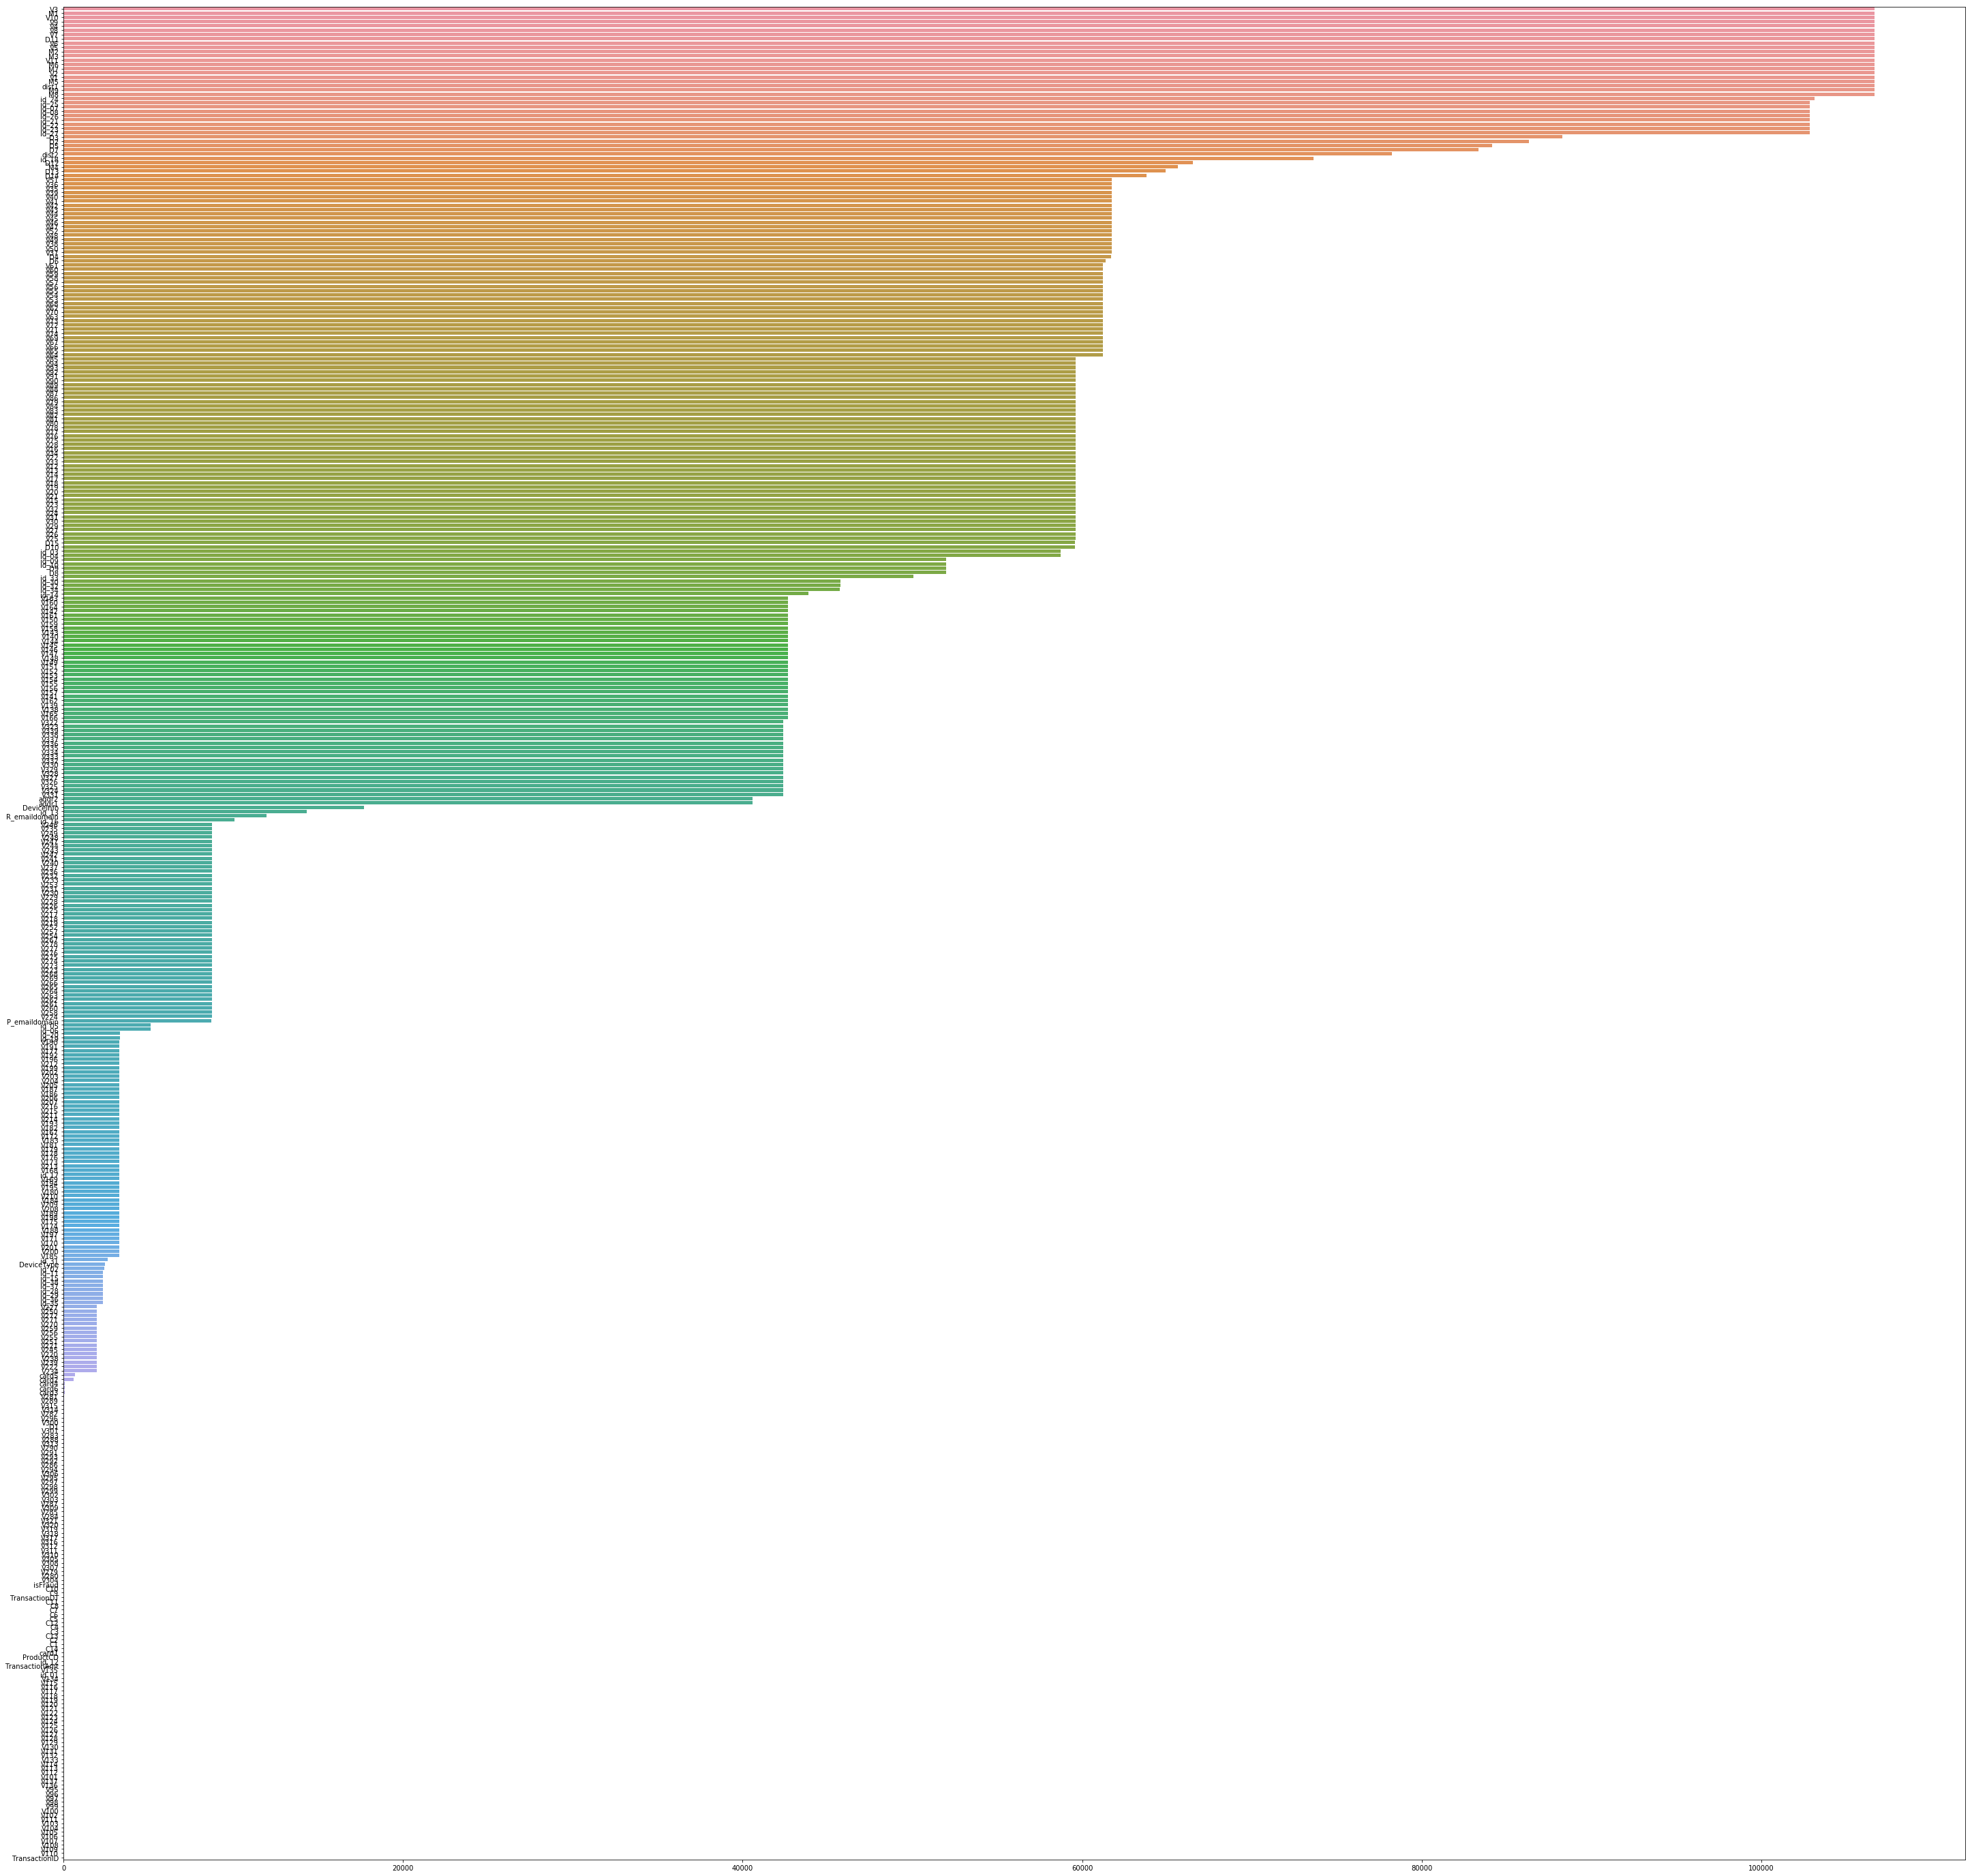

In [7]:
plt.figure(figsize=(50,50))
sns.barplot(train.isnull().sum().sort_values(ascending=False),
            train.isnull().sum().sort_values(ascending=False).index)
plt.show()

In [8]:
train.shape

(106681, 434)

In [0]:
cols_with_max_Nan =  [col for col in train.columns if train[col].isnull().sum() / train.shape[0] > 0.9]

In [10]:
cols_with_max_Nan

['dist1',
 'D11',
 'M1',
 'M2',
 'M3',
 'M5',
 'M6',
 'M7',
 'M8',
 'M9',
 'V1',
 'V2',
 'V3',
 'V4',
 'V5',
 'V6',
 'V7',
 'V8',
 'V9',
 'V10',
 'V11',
 'id_07',
 'id_08',
 'id_21',
 'id_22',
 'id_23',
 'id_24',
 'id_25',
 'id_26',
 'id_27']

From above analysis we see that some columns have more than 90 % data as Nan, Hence we need to remove themn from the dataset

In [0]:
train_new = train.drop(columns=cols_with_max_Nan, axis = 1) 

In [12]:
train.shape

(106681, 434)

In [13]:
train_new.shape

(106681, 404)

We have currently removed 30 columns as 90% data was Nan in Columns, If the Columns have a singlr value for than single value they also need to deleted

In [0]:
maximum_data_for_each_columns = [col for col in train_new.columns if train_new[col].value_counts(dropna=False, normalize=True).values[0] > 0.90]

In [15]:
for i in maximum_data_for_each_columns:
    print(f'{i} \n {train_new[i].value_counts().head(5)}\n\n')

isFraud 
 0    99027
1     7654
Name: isFraud, dtype: int64


C3 
 0.0     104970
1.0       1521
2.0        125
3.0         34
16.0         4
Name: C3, dtype: int64


C5 
 0.0    106681
Name: C5, dtype: int64


C9 
 0.0    106681
Name: C9, dtype: int64


V98 
 0.0    104419
1.0      1946
2.0       228
3.0        49
4.0        21
Name: V98, dtype: int64


V99 
 0.0    101656
1.0      2940
2.0       569
3.0       286
4.0       177
Name: V99, dtype: int64


V100 
 0.0    102877
1.0      2572
2.0       504
3.0       220
4.0       137
Name: V100, dtype: int64


V101 
 0.0    99896
1.0     3946
2.0     1536
3.0      673
4.0      298
Name: V101, dtype: int64


V102 
 0.0    99393
1.0     4043
2.0     1644
3.0      753
4.0      396
Name: V102, dtype: int64


V103 
 0.0    99605
1.0     3978
2.0     1608
3.0      723
4.0      366
Name: V103, dtype: int64


V104 
 0.0    100989
1.0      4181
2.0       964
3.0       303
4.0       102
Name: V104, dtype: int64


V105 
 0.0    100415
1.0      4395
2

In [16]:
len(maximum_data_for_each_columns)

82

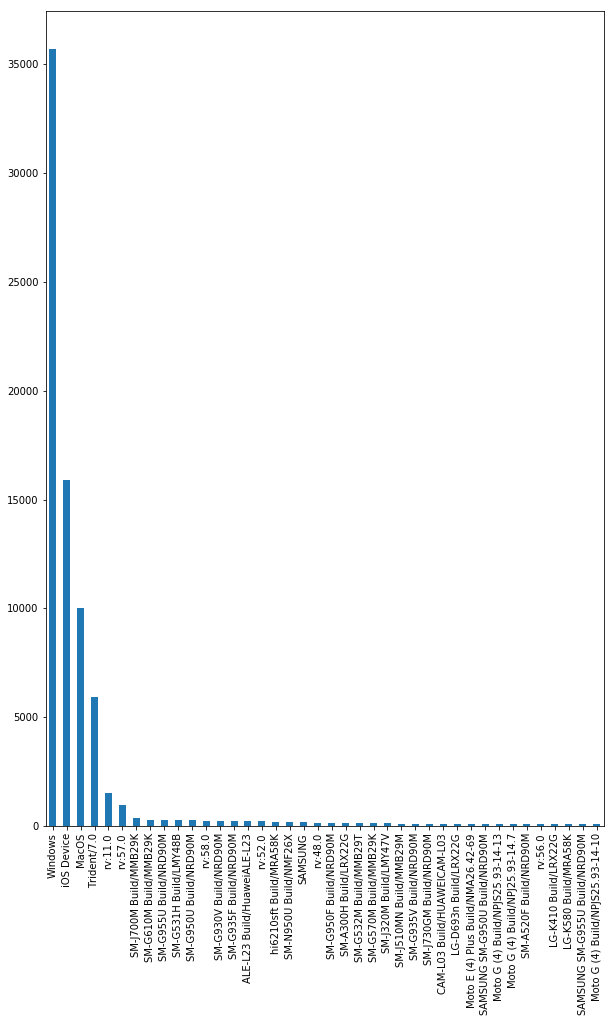

In [23]:
# Plotting DeviceInfo
plt.figure(figsize=(10,15))
pd.value_counts(train_new['DeviceInfo'])[:40].plot.bar()


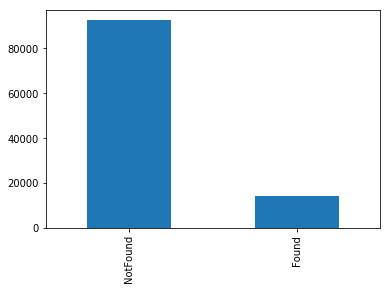

In [25]:
#plotting id_12
pd.value_counts(train_new['id_12']).plot.bar()

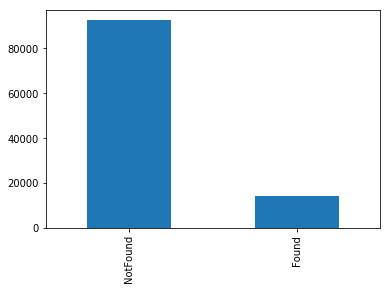

In [26]:
#plotting id_12
pd.value_counts(train_new['id_12']).plot.bar()

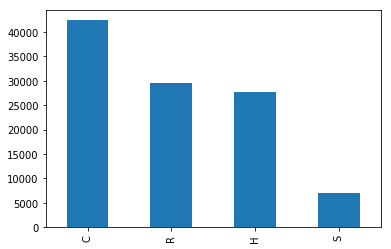

In [28]:
#Plotting the ProductCD
pd.value_counts(train_new['ProductCD']).plot.bar()

In [27]:
train_new.columns

Index(['TransactionID', 'isFraud', 'TransactionDT', 'TransactionAmt',
       'ProductCD', 'card1', 'card2', 'card3', 'card4', 'card5',
       ...
       'id_31', 'id_32', 'id_33', 'id_34', 'id_35', 'id_36', 'id_37', 'id_38',
       'DeviceType', 'DeviceInfo'],
      dtype='object', length=404)

In [24]:
train_new['isFraud'].value_counts()

0    99027
1     7654
Name: isFraud, dtype: int64

**From the above analysis, we see that the data is highly imbalanced.If we train the model with this data then there is a chance that model might be biased towards not Fraud**

In [0]:
from sklearn.preprocessing import LabelEncoder
for each_column in train_new.drop('isFraud', axis=1):
    if train_new[each_column].dtype == 'object':
        lbl = LabelEncoder()
        lbl.fit(list(train_new[each_column].values) + list(train_new[each_column].values))
        train_new[each_column] = lbl.transform(list(train_new[each_column].values))

In [0]:
train_new.fillna(False, inplace=True)

In [0]:

from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(train_new.drop('isFraud',axis=1),
                                                    train_new['isFraud'],
                                                    test_size=.2)

In [57]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression()
model.fit(x_train, y_train)

/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


ValueError: ignored